### [참고] <a href="https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf">Pandas Cheat Sheet</a>

## melt
https://pandas.pydata.org/docs/reference/api/pandas.melt.html

<img src="https://pandas.pydata.org/docs/_images/reshaping_melt.png">

- 1 개 이상 열들을 식별자 변수 형식으로 재형성<br>
<b style='color:red'>- 열 축소, 행 확장</b>

### [실습1]

,first,last,height,weight
0,John,Doe,5.5,130
1,Mary,Bo,6.0,150


#### 1) melt 기본 : 컬럼을 행으로 녹여내는 것(열 축소, 행 확장)
- 컬럼을 변수 처리

,variable,value
0,first,John
1,first,Mary
2,last,Doe
3,last,Bo
4,height,5.5
5,height,6.0
6,weight,130
7,weight,150


,variable,value
0,first,John
1,first,Mary
2,last,Doe
3,last,Bo
4,height,5.5
5,height,6.0
6,weight,130
7,weight,150


#### 2) 식별자 변수 지정 - first, last

,first,last,variable,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


<b style='color:red'>- 열 축소, 행 확장</b>

### [실습2]

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


,variable,value
0,A,a
1,A,b
2,A,c
3,B,1
4,B,3
5,B,5
6,C,2
7,C,4
8,C,6


,var,val
0,A,a
1,A,b
2,A,c
3,B,1
4,B,3
5,B,5
6,C,2
7,C,4
8,C,6


#### [참고]
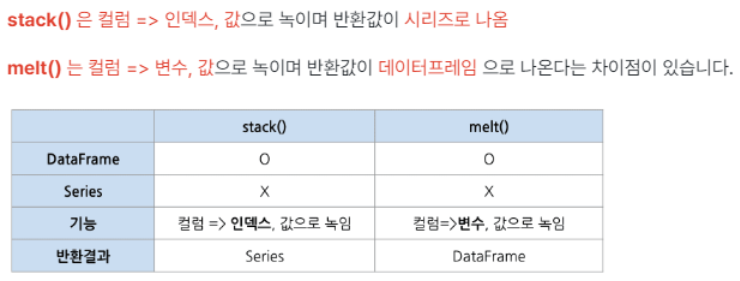

## pivot

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html

- pivot 사전적 의미 : 회전 또는 균형을 맞추는 중심축이나 고정점

<img src="https://pandas.pydata.org/docs/_images/reshaping_pivot.png">

### [실습1]

,name,type,records,gender,period
0,haena,tennis,A,F,3
1,naeun,tennis,B,F,3
2,una,swim,C,F,1
3,bum,swim,A,M,5
4,suho,tennis,B,M,2


#### - 학생들이 활동하는 스포츠 종목에 따라 기록과 성별로 구분

records        gender       
type     swim tennis   swim tennis
name                              
bum         A    NaN      M    NaN
haena     NaN      A    NaN      F
naeun     NaN      B    NaN      F
suho      NaN      B    NaN      M
una         C    NaN      F    NaN

### [실습2]

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


bar,foo,A,B,C
0,one,1,2,3
1,two,4,5,6


### pivot -------> melt

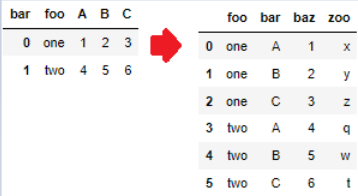

- pivot 이 적용된 데이터 프레임을 melt 를 써서 처음과 유사하게 만들어 보기

bar,foo,A,B,C
0,one,1,2,3
1,two,4,5,6


,foo,bar,value
0,one,A,1
1,two,A,4
2,one,B,2
3,two,B,5
4,one,C,3
5,two,C,6


,foo,bar,value
0,one,A,1
2,one,B,2
4,one,C,3
1,two,A,4
3,two,B,5
5,two,C,6


,foo,bar,baz
0,one,A,1
2,one,B,2
4,one,C,3
1,two,A,4
3,two,B,5
5,two,C,6


,index,foo,bar,baz
0,0,one,A,1
1,2,one,B,2
2,4,one,C,3
3,1,two,A,4
4,3,two,B,5
5,5,two,C,6


,foo,bar,baz
0,one,A,1
1,one,B,2
2,one,C,3
3,two,A,4
4,two,B,5
5,two,C,6


## pivot_table

- https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
- group by를 사용하기 쉽게 해 놓은 게 pivot_table
```
pd.pivot_table(
    data: 'DataFrame',
    values=None,
    index=None,
    columns=None,
    aggfunc: 'AggFuncType' = 'mean',
    fill_value=None,
    margins: 'bool' = False,
    dropna: 'bool' = True,
    margins_name: 'str' = 'All',
    observed: 'bool' = False,
    sort: 'bool' = True,
)
```


,name,type,records,gender,period
0,haena,tennis,A,F,3
1,naeun,tennis,B,F,3
2,una,swim,C,F,1
3,bum,swim,A,M,5
4,suho,tennis,B,M,2


### [실습1]
#### 1) aggfunc 를 주지 않은 경우 : default  mean 적용

records,A,B,C
type,,,
swim,5.0,NaN,1.0
tennis,3.0,2.5,NaN


#### 2) aggfunc 를 주는 경우 : sum 적용

records,A,B,C
type,,,
swim,5.0,NaN,1.0
tennis,3.0,5.0,NaN


### [실습2]

[datetime.datetime(2021, 1, 1, 0, 0),
 datetime.datetime(2021, 2, 1, 0, 0),
 datetime.datetime(2021, 3, 1, 0, 0),
 datetime.datetime(2021, 4, 1, 0, 0),
 datetime.datetime(2021, 5, 1, 0, 0),
 datetime.datetime(2021, 6, 1, 0, 0),
 datetime.datetime(2021, 7, 1, 0, 0),
 datetime.datetime(2021, 8, 1, 0, 0),
 datetime.datetime(2021, 9, 1, 0, 0),
 datetime.datetime(2021, 10, 1, 0, 0),
 datetime.datetime(2021, 11, 1, 0, 0),
 datetime.datetime(2021, 12, 1, 0, 0)]

,A,B,C,D,E
0,one,x,ha,0,2021-01-01
1,one,y,ha,1,2021-02-01
2,two,w,ha,2,2021-03-01
3,three,x,hi,3,2021-04-01
4,one,y,hi,4,2021-05-01
5,one,w,hi,5,2021-06-01
6,two,x,ha,6,2021-07-01
7,three,y,ha,7,2021-08-01
8,one,w,ha,8,2021-09-01
9,one,x,hi,9,2021-10-01


C          ha    hi
A     B            
one   w  14.0  11.0
      x   6.0  15.0
      y   7.0  10.0
three w   NaN  17.0
      x   NaN   9.0
      y  13.0   NaN
two   w   8.0   NaN
      x  12.0   NaN
      y   NaN  16.0

C          ha    hi
A     B            
one   w  28.0  22.0
      x  12.0  30.0
      y  14.0  20.0
three w   NaN  34.0
      x   NaN  18.0
      y  26.0   NaN
two   w  16.0   NaN
      x  24.0   NaN
      y   NaN  32.0

### [정리] pivot 과 pivot_table()

- pivot : 형태만 변경
- pivot_table : 형태 + 연산